In [8]:
import os 
import pandas as pd 
import seaborn as sns 
from matplotlib import pyplot as plt 
import numpy as np 
from datetime import datetime 

In [2]:
df = pd.read_csv("data/customer_sales_data.csv")

In [3]:
df.shape, df.columns

((1000, 6),
 Index(['CustomerID', 'PurchaseDate', 'TransactionAmount', 'ProductInformation',
        'OrderID', 'Location'],
       dtype='object'))

In [4]:
df.head()

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location
0,8814,2023-04-11,943.31,Product C,890075,Tokyo
1,2188,2023-04-11,463.70,Product A,176819,London
2,4608,2023-04-11,80.28,Product A,340062,New York
3,2559,2023-04-11,221.29,Product A,239145,London
4,9482,2023-04-11,739.56,Product A,194545,Paris


In [31]:
df.isnull().sum()

CustomerID            0
PurchaseDate          0
TransactionAmount     0
ProductInformation    0
OrderID               0
Location              0
Recency               0
dtype: int64

In [5]:
df['PurchaseDate'] = pd.to_datetime(df['PurchaseDate'])

In [29]:
df.head()

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,118
1,2188,2023-04-11,463.70,Product A,176819,London,118
2,4608,2023-04-11,80.28,Product A,340062,New York,118
3,2559,2023-04-11,221.29,Product A,239145,London,118
4,9482,2023-04-11,739.56,Product A,194545,Paris,118


In [28]:
df['Recency'] = (datetime.now().date() - df['PurchaseDate'].dt.date).dt.days

In [39]:
df_frequency = df.groupby(by='CustomerID')['OrderID'].count().reset_index()

In [42]:
df_frequency.rename(columns={'OrderID':'Frequency'},inplace=True)

In [43]:
df_frequency.columns

Index(['CustomerID', 'Frequency'], dtype='object')

In [44]:
df = df.merge(df_frequency, how='left', on='CustomerID')

In [45]:
df.head()

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency,Frequency
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,118,1
1,2188,2023-04-11,463.70,Product A,176819,London,118,1
2,4608,2023-04-11,80.28,Product A,340062,New York,118,1
3,2559,2023-04-11,221.29,Product A,239145,London,118,1
4,9482,2023-04-11,739.56,Product A,194545,Paris,118,1


In [47]:
df_monetary = df.groupby(by='CustomerID')['TransactionAmount'].sum().reset_index()

In [49]:
df_monetary.rename(columns={'TransactionAmount':'MonetaryValue'})

,CustomerID,MonetaryValue
0,1011,1129.02
1,1025,359.29
2,1029,704.99
3,1046,859.82
4,1049,225.72
...,...,...
941,9941,960.53
942,9950,679.11
943,9954,798.01
944,9985,36.10


In [55]:
df = df.merge(df_monetary,how='left', on='CustomerID')

In [56]:
df.head()

,CustomerID,PurchaseDate,TransactionAmount_x,ProductInformation,OrderID,Location,Recency,Frequency,TransactionAmount_y
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,118,1,943.31
1,2188,2023-04-11,463.70,Product A,176819,London,118,1,463.70
2,4608,2023-04-11,80.28,Product A,340062,New York,118,1,80.28
3,2559,2023-04-11,221.29,Product A,239145,London,118,1,221.29
4,9482,2023-04-11,739.56,Product A,194545,Paris,118,1,739.56


In [60]:
df.rename(columns={'TransactionAmount_x':'TransactionAmount','TransactionAmount_y':'MonetaryValue'},inplace=True)

In [61]:
df.columns

Index(['CustomerID', 'PurchaseDate', 'TransactionAmount', 'ProductInformation',
       'OrderID', 'Location', 'Recency', 'Frequency', 'MonetaryValue'],
      dtype='object')

In [62]:
recency_score = [5,4,3,2,1]
freq_score = [1,2,3,4,5]
monetary_score = [1,2,3,4,5]

<AxesSubplot: xlabel='Recency', ylabel='Density'>

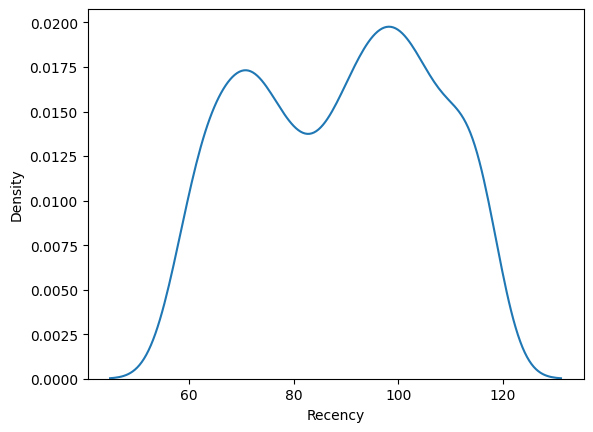

In [92]:
sns.kdeplot(df['Recency'])

In [105]:
pd.cut([1, 1, 1, 2, 3, 4, 4, 4], bins=4).value_counts()

(0.997, 1.75]    3
(1.75, 2.5]      1
(2.5, 3.25]      1
(3.25, 4.0]      3
dtype: int64

In [109]:
pd.qcut([1, 1, 1, 2, 3, 4, 4, 4], q=4,duplicates='drop').value_counts()

(0.999, 2.5]    4
(2.5, 4.0]      4
dtype: int64

In [96]:
pd.cut(df['Recency'], bins=5).value_counts()

(94.0, 106.0]     238
(57.94, 70.0]     201
(70.0, 82.0]      189
(106.0, 118.0]    188
(82.0, 94.0]      184
Name: Recency, dtype: int64

In [101]:
pd.cut(df['Recency'], bins=5, labels=[1, 2, 3, 4, 5]).value_counts()

4    238
1    201
2    189
5    188
3    184
Name: Recency, dtype: int64

In [100]:
pd.qcut(df['Recency'], q=5).value_counts()

(70.0, 83.0]      205
(57.999, 70.0]    201
(105.2, 118.0]    200
(95.0, 105.2]     199
(83.0, 95.0]      195
Name: Recency, dtype: int64

In [71]:
df['RecencyScore'] = pd.cut(df['Recency'],bins=5,labels=recency_score)

In [72]:
df['FrequencyScore'] = pd.cut(df['Recency'],bins=5,labels=freq_score)

In [73]:
df['MonetaryScore'] = pd.cut(df['MonetaryValue'],bins=5,labels=monetary_score)

In [78]:
df['RecencyScore'] = df['RecencyScore'].astype(int)
df['FrequencyScore'] = df['FrequencyScore'].astype(int)
df['MonetaryScore'] = df['MonetaryScore'].astype(int)

In [82]:
df['RFMScore'] =  df['RecencyScore'] + df['FrequencyScore'] + df['MonetaryScore']

In [85]:
df['MonetaryScore'].value_counts()

2    467
1    427
3     84
4     16
5      6
Name: MonetaryScore, dtype: int64

In [111]:
customer_group = ['Low_value', 'Mid_Value','High_Value']
df['CustomerGroup'] = pd.cut(df['RFMScore'],bins=3,labels=customer_group)

In [112]:
df['CustomerGroup'].value_counts()

Low_value     894
Mid_Value      84
High_Value     22
Name: CustomerGroup, dtype: int64

In [116]:
df_customer_group = df.groupby(by='CustomerGroup')['CustomerID'].count().reset_index()

In [120]:
df_customer_group.rename(columns={'CustomerID':'CustomerCount'},inplace=True)

<AxesSubplot: xlabel='CustomerGroup', ylabel='CustomerCount'>

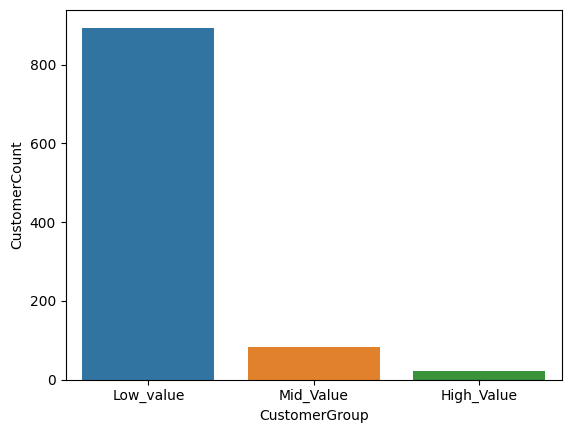

In [121]:
sns.barplot(df_customer_group, x="CustomerGroup",y="CustomerCount")